In [1]:
import numpy as np
from astropy.io import fits
import atlastools
from astropy import units as u

In [2]:
# Issue - better way to search for atlas files? Raise an error if file is not available?
atlas_files_base = 'atlasfiles/'
file  = atlas_files_base + 'neckel.hamburg.atlas.wvscl_smooth.bintab.v1.fits.gz'
#file  = 'neckel.hamburg.atlas.wvscl_smooth.bintab.v1.fits.gz'
#file  = atlas_files_base + 'stenflo.SS3.5mA.bintab.v2.fits'
#file  = atlas_files_base + 'kitt.peak.ir.1-5micron.atlas.wavelnth.bintab.fits.gz'
#file  = atlas_files_base + 'kitt.peak.quietsun.350-740nm.1998.v1.fits.gz'
#f     = fits.open(file)
exten = 1

In [3]:
print(file)
atlasdict = atlastools.make_dictionary(file,1)
fileopen = fits.open(file, memmap=True)
wave_col_id = fileopen[0].header['ATLWVCOL']


atlasfiles/neckel.hamburg.atlas.wvscl_smooth.bintab.v1.fits.gz


In [4]:
print(wave_col_id)
waveref_col = (atlastools.find_column_index(atlasdict, wave_col_id))[0].pop()
print(waveref_col)
print(atlastools.search_key('TDMIN' + waveref_col[0], atlasdict))
print(atlastools.search_key('TDMAX' + waveref_col[0], atlasdict))
print(atlastools.search_key('TCUNI' + waveref_col[0], atlasdict))

wave_col_id = fileopen[0].header['ATLWVCOL']
waveref_col = (atlastools.find_column_index(atlasdict, wave_col_id))[0].pop()
wavemin     = atlastools.search_key('TDMIN' + waveref_col[0], atlasdict)
wavemax     = atlastools.search_key('TDMAX' + waveref_col[0], atlasdict)
waveunit    = atlastools.search_key('TCUNI' + waveref_col[0], atlasdict)
waveunit    = (atlastools.search_key('TCUNI' + waveref_col[0], atlasdict))[0]
waveunit_ap = atlastools.tunit_str_to_unit(waveunit[0])
wavemin     = wavemin[0] * waveunit_ap
wavemax     = wavemax[0] * waveunit_ap
print(wavemin,wavemax)

wave_col_id = (atlastools.search_key('ATLWVCOL',atlasdict))[0]
print(wave_col_id[0])
print((atlastools.search_key('NAXIS2',atlasdict))[0])
print(fileopen[1].header['NAXIS2'])
print(fileopen[0].header['ATLWVCOL'])

print(file)
fcm = atlastools.filecontent_map(file)
print(fcm.extension_info[0].wavemin)

Wavelength Scale   1
['1']
([3290.0013], ['TDMIN1'])
([12509.9824853], ['TDMAX1'])
(['nm'], ['TCUNI1'])
[3290.0013] nm [12509.9824853] nm
Wavelength Scale   1
[1107962]
1107962
Wavelength Scale   1
atlasfiles/neckel.hamburg.atlas.wvscl_smooth.bintab.v1.fits.gz
[3290.0013] nm


In [5]:
print(fcm.extension_info[0].wavemin)
print(fcm.extension_info[0].wavemax)

[3290.0013] nm
[12509.9824853] nm


In [6]:
from pathlib import Path
atlas_package_toolkit   = (Path('atlastools.py').resolve())
print(atlas_package_toolkit)
atlas_package_directory = atlas_package_toolkit.parent
print(atlas_package_directory)

atlas_files = []
for matching_file in atlas_package_directory.rglob("*v1*fits*"):
     atlas_files.append(matching_file.resolve())
     print("-----------------------------------------------------------")
     print(matching_file.resolve())
     print("-----------------------------------------------------------")
     atlastools.filecontent_map(matching_file.resolve())


/Users/kere1282/Google Drive/kreardon/Science/Solar_Atlases/solaratlas/atlastools.py
/Users/kere1282/Google Drive/kreardon/Science/Solar_Atlases/solaratlas
-----------------------------------------------------------
/Users/kere1282/Google Drive/kreardon/Science/Solar_Atlases/solaratlas/atlasfiles/neckel.hamburg.atlas.wvscl_smooth.bintab.v1.fits.gz
-----------------------------------------------------------
-----------------------------------------------------------
/Users/kere1282/Google Drive/kreardon/Science/Solar_Atlases/solaratlas/atlasfiles/kitt.peak.quietsun.350-740nm.1998.v1.fits.gz
-----------------------------------------------------------
-----------------------------------------------------------
/Users/kere1282/Google Drive/kreardon/Science/Solar_Atlases/solaratlas/atlasfiles/kitt.peak.umbra.1-2.5micron.atlas.v1.fits.gz
-----------------------------------------------------------
-----------------------------------------------------------
/Users/kere1282/Google Drive/kreardo

In [7]:
print(atlastools.filesearch(additional_directory=False))

Current directory: /Users/kere1282/Google Drive/kreardon/Science/Solar_Atlases/solaratlas

Available atlas files:

atlasfiles/neckel.hamburg.atlas.wvscl_smooth.bintab.v1.fits.gz
atlasfiles/kitt.peak.quietsun.350-740nm.1998.v1.fits.gz
atlasfiles/kitt.peak.umbra.1-2.5micron.atlas.v1.fits.gz
atlasfiles/kitt.peak.quietsun.1-5micron.atlas.wavelnth.fits.gz
atlasfiles/stenflo.SS3.5mA.bintab.v1.fits.gz
______________________________

atlastools.py directory: /Users/kere1282/Google Drive/kreardon/Science/Solar_Atlases/solaratlas

Available atlas files:

atlasfiles/neckel.hamburg.atlas.wvscl_smooth.bintab.v1.fits.gz
atlasfiles/kitt.peak.quietsun.350-740nm.1998.v1.fits.gz
atlasfiles/kitt.peak.umbra.1-2.5micron.atlas.v1.fits.gz
atlasfiles/kitt.peak.quietsun.1-5micron.atlas.wavelnth.fits.gz
atlasfiles/stenflo.SS3.5mA.bintab.v1.fits.gz
______________________________

atlasfiles/ directory: /Users/kere1282/Google Drive/kreardon/Science/Solar_Atlases/solaratlas

Available atlas files:

atlasfiles/neck

In [8]:
# present high level view of atlas file contents (extensions, binary table columns)
file  = atlas_files[1]
exten = 1
print("Input file name: ", file)
print("Input extension: ", exten, "\n")
fcmap1 = atlastools.filecontent_map(file)
print,fcmap1.filename

Input file name:  /Users/kere1282/Google Drive/kreardon/Science/Solar_Atlases/solaratlas/atlasfiles/kitt.peak.quietsun.350-740nm.1998.v1.fits.gz
Input extension:  1 



(<function print>,
 PosixPath('/Users/kere1282/Google Drive/kreardon/Science/Solar_Atlases/solaratlas/atlasfiles/kitt.peak.quietsun.350-740nm.1998.v1.fits.gz'))

In [9]:
# extract all header keyword values from FITS file extension and store in a dictionary
dictionary = atlastools.make_dictionary(file,exten)
print(atlastools.find_column_index(dictionary,'Sun'))
print("=====")
print((atlastools.find_column_index(dictionary, 'Sun'))[0])
print("=====")
(colfind, colname) = atlastools.find_column_index(dictionary, 'Telluric Spectrum   1')
print(type(colfind[0]),colfind[0])
print(type(colname),colname[0])
print(colfind[0].pop())

([['2'], ['3']], ['TOBJC2', 'TOBJC3'])
=====
[['2'], ['3']]
=====
<class 'list'> ['4']
<class 'list'> TTYPE4
4


In [10]:
dictionary

{'SIMPLE': True,
 'BITPIX': 8,
 'NAXIS': 2,
 'EXTEND': True,
 'OBJECT': 'Sun',
 'CMPNT_01': 'Wavelength Scale',
 'CMPNT_02': 'Intensity Atlas with Telluric Absorption',
 'CMPNT_03': 'Intensity Atlas without Telluric Absorption',
 'CMPNT_04': 'Derived Telluric Absorption',
 'CTYPE1': 'AWAV',
 'CDELT1': 0.0002,
 'CUNIT1': 'nm',
 'WAVEREF': 'air',
 'WAVEMIN': 357.001647949,
 'WAVEMAX': 740.699647949,
 'WAVEUNIT': -9,
 'WAVENAME': 'nm',
 'ATLWVCOL': 'Wavelength Scale   1',
 'ATLSPCOL': 'Local Intensity   1',
 'ATL_SAMP': 'uniform',
 'ATLRSLTN': '350000',
 'ATL_SOUR': 'Kitt Peak/FTS/Wallace 1998',
 'ATL_MU': 1.0,
 'ATL_RAD': 0.0,
 'FILEVER': '0.9',
 'ATL_WSOL': True,
 'ATL_MISS': -1.0,
 'ATL_OBS': 'Kitt Peak Observatory',
 'ATL_INST': 'FTS',
 'ATL_LAT': 31.9583,
 'ATL_LONG': 111.595,
 'ATL_ALT': 2096.0,
 'LONGSTRN': 'OGIP 1.0',
 'ATL_ADS1': 'https://ui.adsabs.harvard.edu/abs/1998assp.book.....W',
 'COMMENT':  This FITS file may contain long string keyword values that are
  continued over mu

In [11]:
# output values of all keywords with a certain basename
atlastools.search_key('TTYPE', dictionary)

(['Wavelength Scale   1',
  'Local Intensity   1',
  'Local Intensity   2',
  'Telluric Spectrum   1'],
 ['TTYPE1', 'TTYPE2', 'TTYPE3', 'TTYPE4'])

In [12]:
# print more detailed information on the contents of each column in the binary table
atlastools.column_information(dictionary)

nan

Component type: Wavelength Scale   1
Column data units: Nanometers
Axis Labels: Kitt Peak/1998 Wavelength Scale
Target: Data Scale
Derivation Method: Observation - Direct
Includes Telluric Absorption: False



In [13]:
# print which columns include telluric absorption
atlastools.telluric_info(dictionary)

Data type: Wavelength Scale   1 - Includes telluric absorption?: False

Data type: Local Intensity   1 - Includes telluric absorption?: True

Data type: Local Intensity   2 - Includes telluric absorption?: False

Data type: Telluric Spectrum   1 - Includes telluric absorption?: True



In [14]:
wavelength_primary_colindex = [[], ['1']]
print(wavelength_primary_colindex)
print(wavelength_primary_colindex[0])

[[], ['1']]
[]


In [15]:
import re
keyword_match = []
for keyword, value in dictionary.items():
    if value == True and re.search(r'[0-9]$',keyword):
            keyword_match.append(keyword)
            print(keyword, value)
print(keyword_match)
print(atlastools.find_column_index(dictionary, True,'^TWATM'))


TWATM2 True
TWSOL2 True
TWSOL3 True
TWATM4 True
['TWATM2', 'TWSOL2', 'TWSOL3', 'TWATM4']
([['2'], ['4']], ['TWATM2', 'TWATM4'])


In [16]:
# load in contents of selected file
(file_data, spec_data) = atlastools.store_data(file, exten)
print("\n### atlas metadata information keys ###")
#print(spec_data.keys())
print("\n### full atlas metadata information ###")
#print(spec_data)
print("\n### full atlas spectral data ###")
print(file_data)
print("\n### end ###")
spec1d_all = []
spec_temp = spec_data['Local Intensity   1']
spec1d_all.append(spec_temp)
spec_temp = spec_data['Telluric Spectrum   1']
spec1d_all.append(spec_temp)
#print(spec1d_all)
spec1d_all = []
for key in spec_data:
    print("key - ",key)
    spec1d_all.append(spec_data[key])
print(spec1d_all)

checking  ['Wavelength Scale   1', 'Local Intensity   1', 'Local Intensity   2', 'Telluric Spectrum   1']
keywords  ['TTYPE1', 'TTYPE2', 'TTYPE3', 'TTYPE4']
Wavelength Scale   1
Primary Wavelength Scale TTYPE1 Wavelength Scale   1
Local Intensity   1
Local Intensity   2
Telluric Spectrum   1
Wavelength Scale   1 [['1']]
<class 'str'> Nanometers
1918489

### atlas metadata information keys ###

### full atlas metadata information ###

### full atlas spectral data ###
{'Wavelength Scale   1': <Quantity [357.00184795, 357.00204795, 357.00224795, ..., 740.69904795,
           740.69924795, 740.69944795] nm>, 'Local Intensity   1': <Quantity [0.06899895, 0.06946772, 0.07014145, ..., 0.9896923 , 0.98953325,
           0.9893479 ]>, 'Local Intensity   2': <Quantity [0.06814852, 0.06861152, 0.06927694, ..., 0.9907729 , 0.99054056,
           0.99031216]>, 'Telluric Spectrum   1': <Quantity [0.99742305, 0.99742305, 0.99742305, ..., 0.99891067, 0.99898386,
           0.9990266 ]>}

### end ###
k

In [17]:
search_key = 'Local Intensity   1'
spect_atm  = spec_data.get(search_key)
print(type(spect_atm))
search_key = 'Telluric Spectrum   1'
spect_atm  = spec_data.get(search_key)
print(type(spect_atm))


<class 'specutils.spectra.spectrum1d.Spectrum1D'>
<class 'specutils.spectra.spectrum1d.Spectrum1D'>


In [18]:
# create atlas object using make_atlas, but don't populate it with full spectral data
atlas = atlastools.make_atlas(file, exten)
print(atlas.observatory.name)
print(atlas.observatory.location)
# only the metadata were loaded, not the full spectra
print(atlas.sun)

['Kitt Peak Observatory']
[(-1994164.26473224, 5037968.43602035, 3357618.61510581)] m
0


In [19]:
# create atlas object using make_atlas, but by
# setting 'loaddata', the full spectra are included in the atlas object
atlas = atlastools.make_atlas(file, exten, loaddata=1)
print(atlas.sun.meta)
print("\n#####",atlas.sun.spectral_axis)
print("\n#####")
#print(atlas.atm.meta)
print(atlas.atm)
#print("\n#####",(atlas.components['Local Intensity   1']).meta)


checking  ['Wavelength Scale   1', 'Local Intensity   1', 'Local Intensity   2', 'Telluric Spectrum   1']
keywords  ['TTYPE1', 'TTYPE2', 'TTYPE3', 'TTYPE4']
Wavelength Scale   1
Primary Wavelength Scale TTYPE1 Wavelength Scale   1
Local Intensity   1
Local Intensity   2
Telluric Spectrum   1
Wavelength Scale   1 [['1']]
<class 'str'> Nanometers
1918489
populating solar atlas object
populating telluric atlas object
OrderedDict([('col_type', ['Local Intensity   1']), ('unit', ['Relint']), ('has_telluric', [True]), ('has_solar', [True]), ('observed_object', ['Sun']), ('observed_target', ['Quiet Sun']), ('col_title', ['KP Visible 1998 with Atmosphere']), ('col_label', ['KP Vis w/ Atm']), ('col_description', ['Kitt Peak Visible Disk Center Atlas 1998']), ('col_method', ['Observation - Direct']), ('title', ['KP Visible 1998 with Atmosphere'])])

##### [357.00184795 357.00204795 357.00224795 ... 740.69904795 740.69924795
 740.69944795] nm

#####
Spectrum1D (length=1918489)
flux:             [

In [20]:
for solobj in atlas.components:
   print("\n=====",solobj)
   print("\n#####",atlas.components[solobj])
   one_component = atlas.components[solobj]
   print(one_component.meta['has_telluric'])
   print(solobj)
print(atlas.components)


===== Local Intensity   1

##### Spectrum1D (length=1918489)
flux:             [ 0.068999, ..., 0.98935 ],  mean=0.86228
spectral axis:    [ 357.0 nm, ..., 740.7 nm ],  mean=548.85 nm
[True]
Local Intensity   1

===== Local Intensity   2

##### Spectrum1D (length=1918489)
flux:             [ 0.068149, ..., 0.99031 ],  mean=0.84412
spectral axis:    [ 357.0 nm, ..., 740.7 nm ],  mean=548.85 nm
[False]
Local Intensity   2

===== Telluric Spectrum   1

##### Spectrum1D (length=1918489)
flux:             [ 0.99742, ..., 0.99903 ],  mean=0.98447
spectral axis:    [ 357.0 nm, ..., 740.7 nm ],  mean=548.85 nm
[True]
Telluric Spectrum   1
{'Local Intensity   1': <Spectrum1D(flux=<Quantity [0.06899895, 0.06946772, 0.07014145, ..., 0.9896923 , 0.98953325,
           0.9893479 ]>, spectral_axis=<SpectralCoord [357.00184795, 357.00204795, 357.00224795, ...,
                740.69904795, 740.69924795, 740.69944795] nm, 
	radial_velocity=0.0 km / s, 
	redshift=0.0, 
	doppler_rest=0.0 Angstrom, 
	do

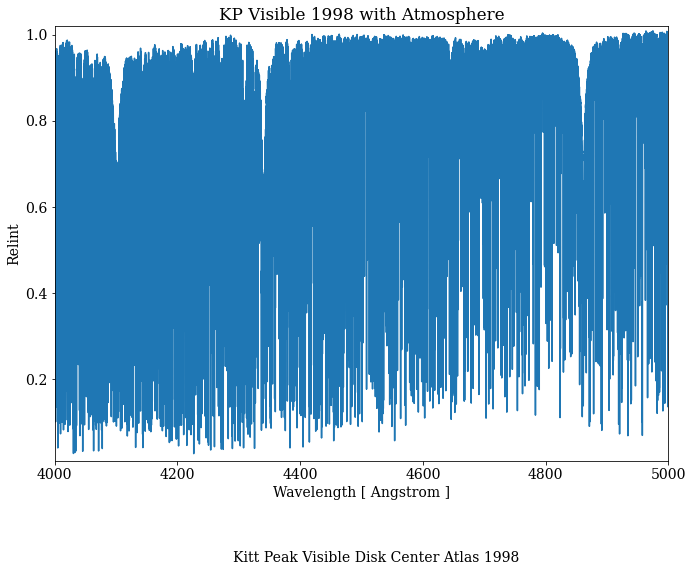

In [22]:
atlastools.atlas_spectrum_plot('Local Intensity   1', atlas, 
            startwave=4000*u.AA, endwave=500*u.nm, plot_unit='angstrom')

checking  ['Wavelength Scale   1', 'Local Intensity   1', 'Local Flux   1']
keywords  ['TTYPE1', 'TTYPE2', 'TTYPE3']
Wavelength Scale   1
Primary Wavelength Scale TTYPE1 Wavelength Scale   1
Local Intensity   1
Local Flux   1
Wavelength Scale   1 [['1']]
<class 'str'> Nanometers
1107960
populating solar atlas object


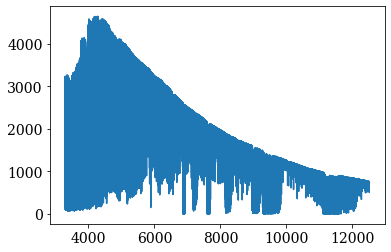

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import atlastools
from astropy import units as u

atlas_files_base = 'atlasfiles/'
file  = atlas_files_base + 'neckel.hamburg.atlas.wvscl_smooth.bintab.v1.fits.gz'

exten = 1
atlas = atlastools.make_atlas(file, exten, loaddata=1)
continuum_normalized_spectrum = (atlas.components['Local Intensity   1'])
local_flux = (atlas.components['Local Flux   1'])

spectral_axis = continuum_normalized_spectrum.spectral_axis
spectral_data      = continuum_normalized_spectrum.flux * local_flux.flux
plt.plot(spectral_axis, spectral_data)
